### Bike Sharing/Rental Assignment

#### Problem Statement:

This is a US bike-sharing provider **BoomBikes** wants to assess the market condition post Covid 19, to cover their losses and make remarkable profits by drafting a mindful business plan. In such an attempt, company wants to understand the demand for sharing bikes among people so that they can better prepare once the economy restores to healthy state.

Essentially, the company wants —

- To identify which variables are significant in predicting the demand for sharing bikes.

- How well those variables descrive the bike demands.

- How well the model can predict for future demands based on the features needed to predict the same.

**So interpretation is important!**

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [4]:
# Importing dataset
bike_sharing = pd.read_csv('day.csv')

In [5]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Checking for null values and column types
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# check the stats of the dataset
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Visualization

We can understand the data and how correlated target variable is with other variables, and also lets focus to understand if there is any multicollinearity

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 2000x1200 with 0 Axes>

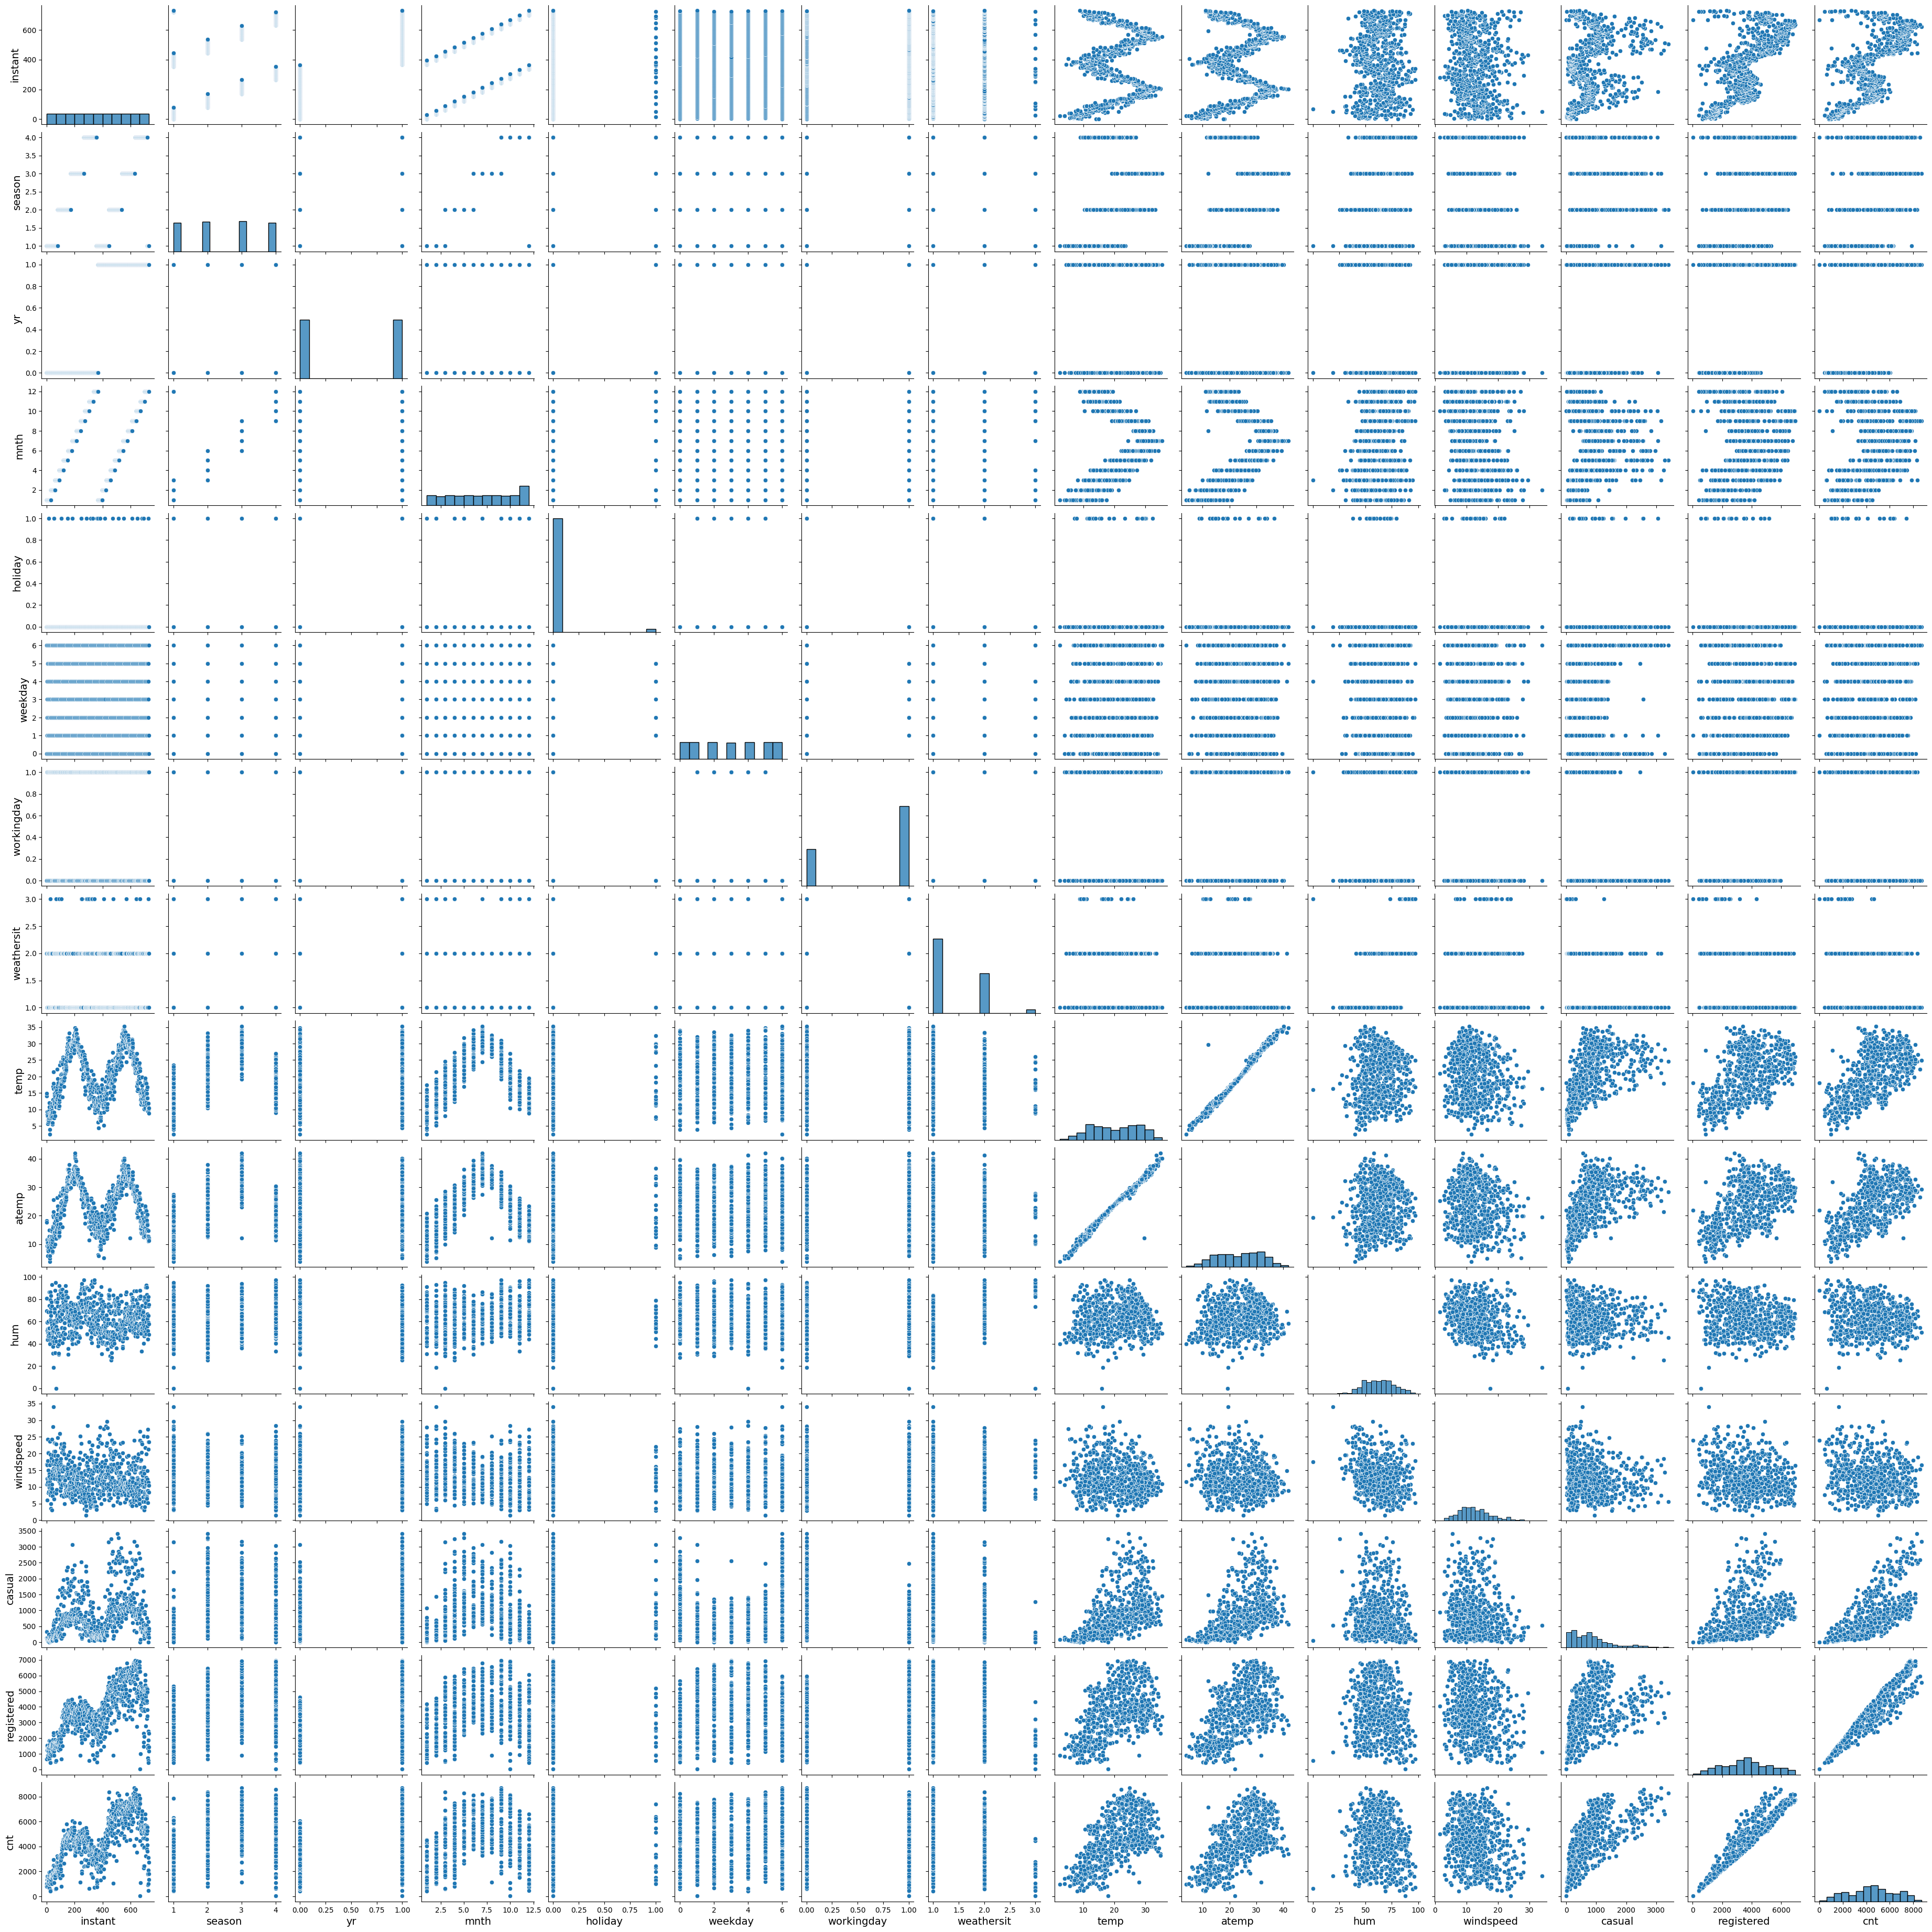

In [9]:
plt.figure(figsize=(20, 12))
pairplot = sns.pairplot(bike_sharing)

for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
plt.show()

**Interpretation:** We can clearly see that the registered users have perfect linear line with target variable **cnt** which clearly shows perfect linear relationship with registered users and usage where as for casual users the relationship is not that perfect linear line. This shows the tendency towards registration, as the registration of the users increases count increases. Company can give some discounts to make them registered users and give exciting offers which can increase the usage.

Clearly, there are many categorical columns by looking at the plot we can see that clearly, lets visualize the categorical columns separately to get the understanding of those.

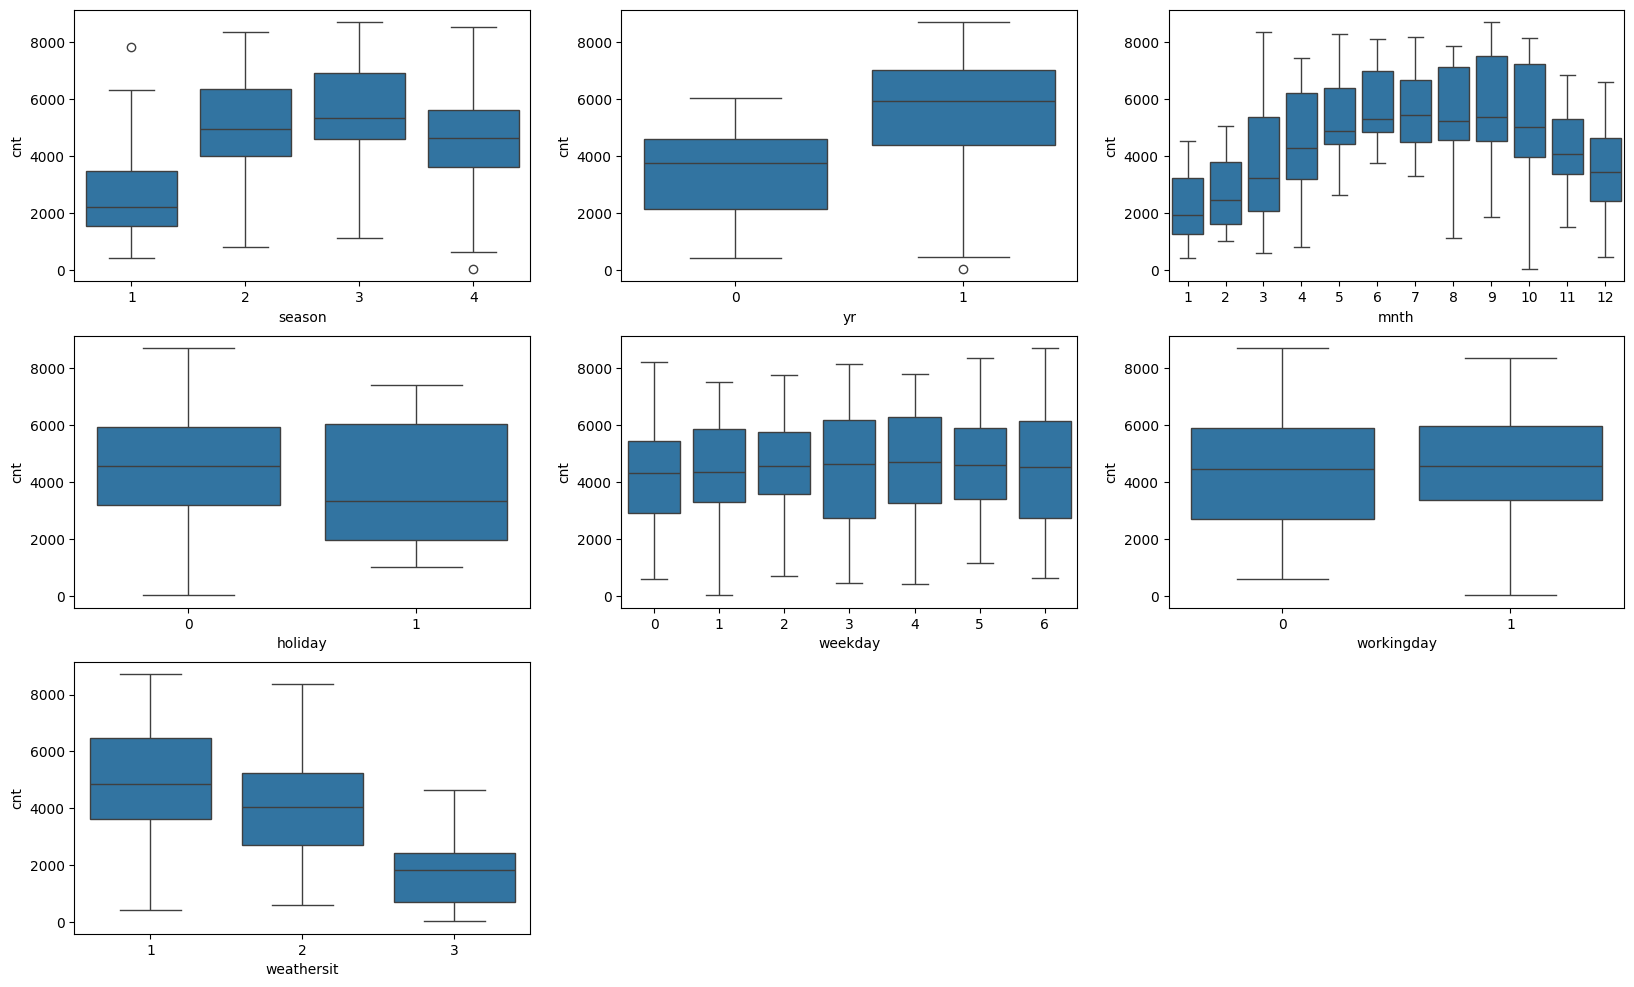

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.show()

We can see from the box plot that Season and weathersit has great correlation with usage of bikes, like clear skies has the highest usage, Fall has high usage than other seasons. As the seasons months also follow the same distribution fall months has highest usage (Sep - Nov)

In [11]:
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'], format='mixed')


<Axes: >

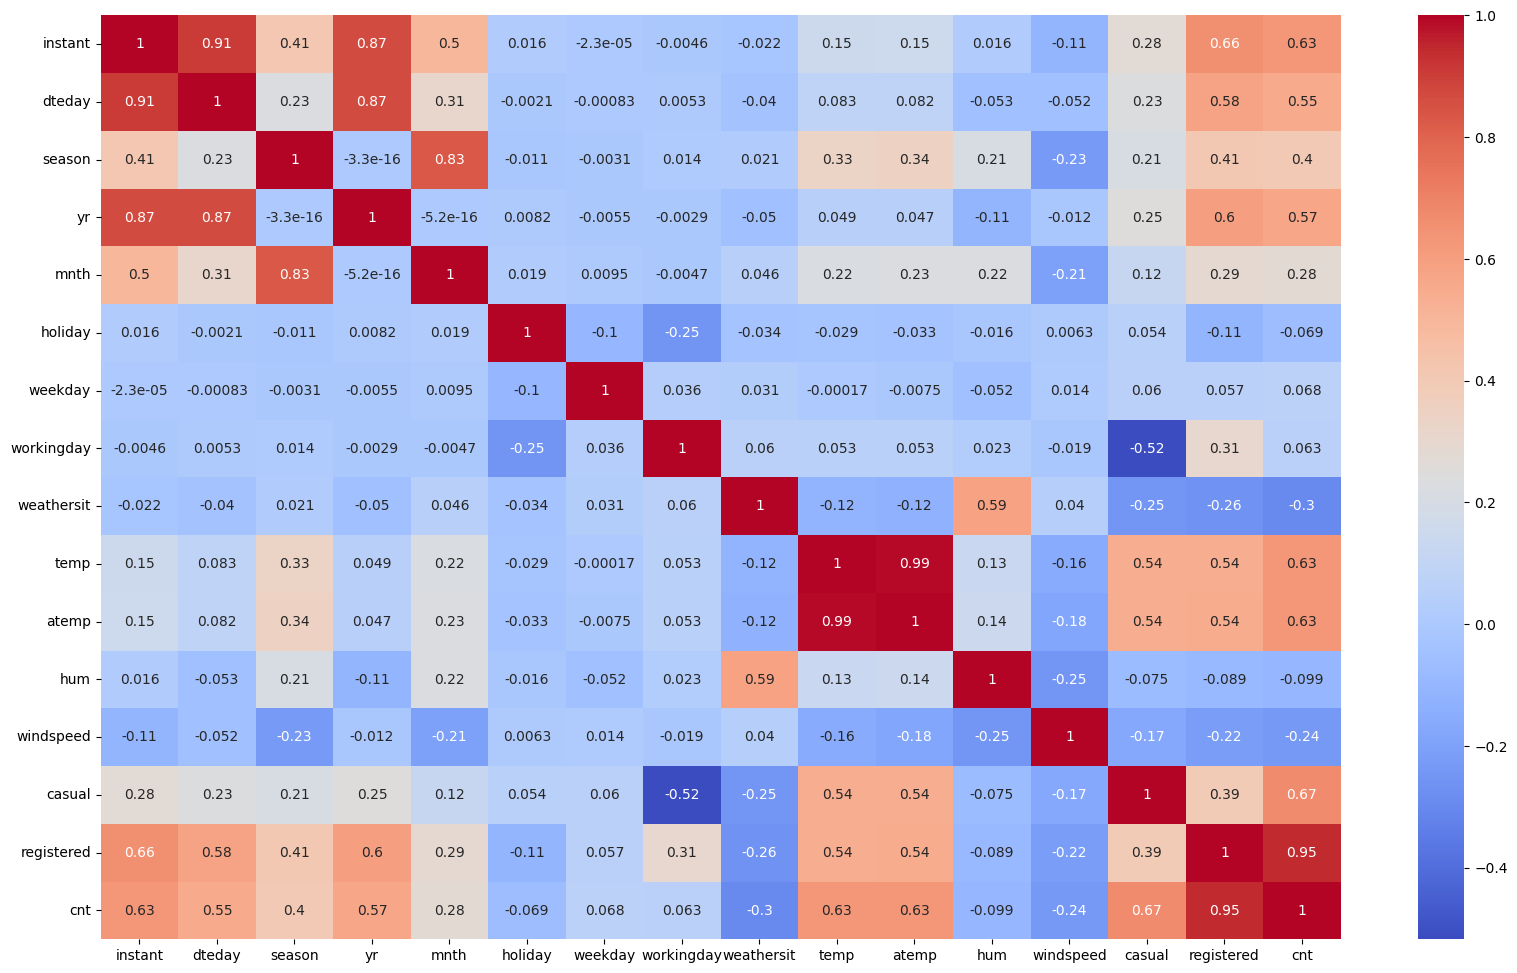

In [12]:
# plot the heatmap to check the correlation
plt.figure(figsize=(20, 12))
sns.heatmap(bike_sharing.corr(), annot=True, cmap='coolwarm')

### Data Preparation

In [13]:
# Looking at the first five rows
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# dropping instant and dteday columns as instant is just a serial number and dteday is already represented by yr and mnth
bike_sharing_backup = bike_sharing.copy()
bike_sharing = bike_sharing.drop(['instant', 'dteday'], axis=1)

In [15]:
# Change column names yr to year and mnth to month for readability
bike_sharing = bike_sharing.rename(columns={'yr': 'year', 'mnth': 'month'})

In [16]:
# Convert year values to actual years instead of 0 and 1
bike_sharing['year'] = bike_sharing['year'].map({0: 2018, 1: 2019})

In [17]:
# Convert season values to actual seasons instead of 1, 2, 3, 4
bike_sharing['season'] = bike_sharing['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

In [18]:
# Convert weathersit values to actual weather conditions instead of 1, 2, 3, 4
bike_sharing['weathersit'] = bike_sharing['weathersit'].map({1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'})

In [19]:
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,2018,1,0,6,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,2018,1,0,0,0,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,2018,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,2018,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,2018,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dummy Variables

The variable `season` has four levels. We need to convert these levels into integer as well.
The variable `weathersit` has four levels. We need to convert these levels into integer as well.

For this, we will use something called `dummy variables`.

Now, you don't need four columns. You can drop the `season` and `weathersit` columns, as the types can be identified with just the 3 columns where — 
- `000` will correspond to `Fall`
- `100` will correspond to `Summer`
- `010` will correspond to `Fall`
- `001` will correspond to `Winter`

Similarly, for `weathersit`::
- `000` will correspond to `Clear`
- `100` will correspond to `Mist/Cloudy`
- `010` will correspond to `Light Rain/Snow`
- `001` will correspond to `Heavy Rain/Snow`

In [20]:
# Let's drop the first column from status df using 'drop_first = True'
season = pd.get_dummies(bike_sharing['season'], drop_first = True).astype(int)

# Add the results to the original housing dataframe
bike_sharing = pd.concat([bike_sharing, season], axis = 1)

# Now let's see the head of our dataframe.
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter
0,Spring,2018,1,0,6,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,Spring,2018,1,0,0,0,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,Spring,2018,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,Spring,2018,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,Spring,2018,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [21]:
# Let's drop the first column from weathersit df using 'drop_first = True'
season = pd.get_dummies(bike_sharing['weathersit'], drop_first = True).astype(int)

# Add the results to the original housing dataframe
bike_sharing = pd.concat([bike_sharing, season], axis = 1)

# Now let's see the head of our dataframe.
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter,Light Rain/Snow,Mist/Cloudy
0,Spring,2018,1,0,6,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,Spring,2018,1,0,0,0,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,Spring,2018,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,Spring,2018,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,Spring,2018,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


In [22]:
# map weekday to actual days instead of 0 to 6
bike_sharing['weekday'] = bike_sharing['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'})

In [23]:
# weekday
weekday = pd.get_dummies(bike_sharing['weekday'], drop_first = True).astype(int)

# Add the results to the original housing dataframe
bike_sharing = pd.concat([bike_sharing, weekday], axis = 1)

# Now let's see the head of our dataframe.
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Spring,Summer,Winter,Light Rain/Snow,Mist/Cloudy,Monday,Sunday,Thursday,Tuesday,Wednesday
0,Spring,2018,1,0,Friday,0,Mist/Cloudy,14.110847,18.18125,80.5833,...,1,0,0,0,1,0,0,0,0,0
1,Spring,2018,1,0,Sunday,0,Mist/Cloudy,14.902598,17.68695,69.6087,...,1,0,0,0,1,0,1,0,0,0
2,Spring,2018,1,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,1,0,0,0,0,1,0,0,0,0
3,Spring,2018,1,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,0,0,1,0
4,Spring,2018,1,0,NaN,1,Clear,9.305237,11.46350,43.6957,...,1,0,0,0,0,0,0,0,0,0


In [24]:
# map month to actual months instead of 1 to 12
bike_sharing['month'] = bike_sharing['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec' })

In [25]:
# month
month = pd.get_dummies(bike_sharing['month'], drop_first = True).astype(int)

# Add the results to the original housing dataframe
bike_sharing = pd.concat([bike_sharing, month], axis = 1)

# Now let's see the head of our dataframe.
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep
0,Spring,2018,Jan,0,Friday,0,Mist/Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,Spring,2018,Jan,0,Sunday,0,Mist/Cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,Spring,2018,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,Spring,2018,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,Spring,2018,Jan,0,NaN,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [26]:
# Drop casual and registered as cnt is the sum of these two columns
bike_sharing.drop(['casual', 'registered'], axis = 1, inplace = True)

In [27]:
# Drop 'season','weathersit', 'month' and 'weekday' as we have created the dummies for it
bike_sharing.drop(['season', 'weathersit', 'month', 'weekday'], axis = 1, inplace = True)

bike_sharing.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [28]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features

Lets use MinMax scaling to bring everything to one scale

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
# Apply scaler to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'year']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep
653,1.0,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1.0,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1.0,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1.0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1.0,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


### Dividing into X and Y sets for model building

In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building linear regression model

lets use RFE (Recursive feature elimination), to coarse pick the features required to predict the demand ie., predict the cnt

In [32]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Running RFE with the output number of the variable equal to 15, let's see the top 15 variables and then we can decide how many variables we want to keep by using manual feature selection and VIF method
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 2),
 ('Winter', True, 1),
 ('Light Rain/Snow', True, 1),
 ('Mist/Cloudy', True, 1),
 ('Monday', False, 2),
 ('Sunday', True, 1),
 ('Thursday', False, 2),
 ('Tuesday', False, 2),
 ('Wednesday', False, 2),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', False, 2),
 ('Jun', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sep', True, 1)]

In [35]:
columns = X_train.columns[rfe.support_]
columns

Index(['year', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Light Rain/Snow', 'Mist/Cloudy', 'Sunday', 'Dec', 'Jan',
       'Sep'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_] # columns that are not selected by RFE

Index(['workingday', 'Summer', 'Monday', 'Thursday', 'Tuesday', 'Wednesday',
       'Aug', 'Feb', 'July', 'Jun', 'Mar', 'May', 'Nov', 'Oct'],
      dtype='object')

### Building linear model 

Using statsmodel library to understand and check the stats

In [37]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[columns]

In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [40]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          4.14e-187
Time:                        00:04:40   Log-Likelihood:                 506.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     495   BIC:                            -920.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3631      0.032     11.476      0.000       0.301       0.425
year                0.2332      0.008     28.520      0.000       0.217       0.249
holiday            -0.1044      0.026     -4.040      0.000      -0.155      -0.054
temp                0.3047      0.129      2.357      0.019       0.051       0.559
atemp               0.1002      0.136      0.735      0.463      -0.168       0.368
hum                -0.1201      0.038     -3.159      0.002      -0.195      -0.045
windspeed          -0.1702      0.026     -6.466      0.000      -0.222      -0.118
Spring             -0.1005      0.015     -6.500      0.000      -0.131      -0.070
Winter              0.0573      0.013      4.492      0.000       0.032       0.082
Light Rain/Snow    -0.2640      0.027     -9.871      0.000      -0.316      -0.211
Mist/Cloudy        -0.0604      0.011     -5.677      0.000      -0.081      -0.040
Sunday             -0.0480      0.012     -4.141      0.000      -0.071      -0.025
Dec                -0.0352      0.016     -2.181      0.030      -0.067      -0.003
Jan                -0.0541      0.018     -3.003      0.003      -0.090      -0.019
Sep                 0.0707      0.015      4.606      0.000       0.041       0.101
==============================================================================
Omnibus:                       74.207   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.356
Skew:                          -0.714   Prob(JB):                     1.15e-44
Kurtosis:                       5.735   Cond. No.                         75.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### atemp p-value is very high, hence dropping as its not significant with high p-value

In [41]:
# drop atemp as it has high p-value
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [42]:
X_train_rfe1 = sm.add_constant(X_train_new)

In [43]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model

In [44]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.1
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.74e-188
Time:                        00:04:41   Log-Likelihood:                 506.71
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     496   BIC:                            -926.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3647      0.032     11.563      0.000       0.303       0.427
year                0.2331      0.008     28.530      0.000       0.217       0.249
holiday            -0.1052      0.026     -4.075      0.000      -0.156      -0.054
temp                0.3970      0.030     13.113      0.000       0.338       0.456
hum                -0.1181      0.038     -3.116      0.002      -0.193      -0.044
windspeed          -0.1735      0.026     -6.689      0.000      -0.224      -0.123
Spring             -0.1005      0.015     -6.502      0.000      -0.131      -0.070
Winter              0.0580      0.013      4.561      0.000       0.033       0.083
Light Rain/Snow    -0.2656      0.027     -9.972      0.000      -0.318      -0.213
Mist/Cloudy        -0.0607      0.011     -5.711      0.000      -0.082      -0.040
Sunday             -0.0480      0.012     -4.140      0.000      -0.071      -0.025
Dec                -0.0354      0.016     -2.195      0.029      -0.067      -0.004
Jan                -0.0549      0.018     -3.051      0.002      -0.090      -0.020
Sep                 0.0706      0.015      4.597      0.000       0.040       0.101
==============================================================================
Omnibus:                       72.802   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.977
Skew:                          -0.700   Prob(JB):                     6.21e-44
Kurtosis:                       5.721   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Calculate the VIFs for the latest model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.48
3,temp,2.88
6,Spring,2.71
4,hum,1.89
7,Winter,1.87
12,Jan,1.61
9,Mist/Cloudy,1.57
8,Light Rain/Snow,1.25
11,Dec,1.24
5,windspeed,1.20


In [46]:
# drop const as it has high VIF
X_train_rfe1 = X_train_rfe1.drop(["const"], axis = 1)

In [47]:
# Calculate the VIFs for the latest model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.57
2,temp,13.96
4,windspeed,4.00
5,Spring,2.93
8,Mist/Cloudy,2.27
6,Winter,2.22
0,year,2.06
11,Jan,1.72
10,Dec,1.34
7,Light Rain/Snow,1.23


In [48]:
# drop hum as it has high VIF
X_train_rfe1 = X_train_rfe1.drop(["hum"], axis = 1)

In [49]:
X_train_lm = sm.add_constant(X_train_rfe1)
lm2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [50]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.4
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.01e-187
Time:                        00:04:41   Log-Likelihood:                 501.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     497   BIC:                            -922.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3024      0.025     12.292      0.000       0.254       0.351
year                0.2359      0.008     28.776      0.000       0.220       0.252
holiday            -0.1063      0.026     -4.081      0.000      -0.157      -0.055
temp                0.3754      0.030     12.628      0.000       0.317       0.434
windspeed          -0.1524      0.025     -6.035      0.000      -0.202      -0.103
Spring             -0.1021      0.016     -6.559      0.000      -0.133      -0.072
Winter              0.0512      0.013      4.055      0.000       0.026       0.076
Light Rain/Snow    -0.2984      0.025    -12.089      0.000      -0.347      -0.250
Mist/Cloudy        -0.0799      0.009     -9.153      0.000      -0.097      -0.063
Sunday             -0.0505      0.012     -4.331      0.000      -0.073      -0.028
Dec                -0.0396      0.016     -2.446      0.015      -0.071      -0.008
Jan                -0.0583      0.018     -3.219      0.001      -0.094      -0.023
Sep                 0.0669      0.015      4.334      0.000       0.037       0.097
==============================================================================
Omnibus:                       72.729   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.542
Skew:                          -0.705   Prob(JB):                     3.46e-43
Kurtosis:                       5.686   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# drop const as it has high p-value
X_train_lm = X_train_lm.drop(["const"], axis = 1)

In [52]:
# Calculate the VIFs for the latest model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.96
2,temp,3.84
4,Spring,2.37
0,year,2.06
10,Jan,1.64
5,Winter,1.63
7,Mist/Cloudy,1.51
9,Dec,1.29
8,Sunday,1.18
11,Sep,1.16


### Residual analysis of train data

Now we have to check the predictions on the train set first to understand, how well the model has learned the data and can predict it and see the error terms

In [53]:
y_train_cnt = lm2.predict()

In [54]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

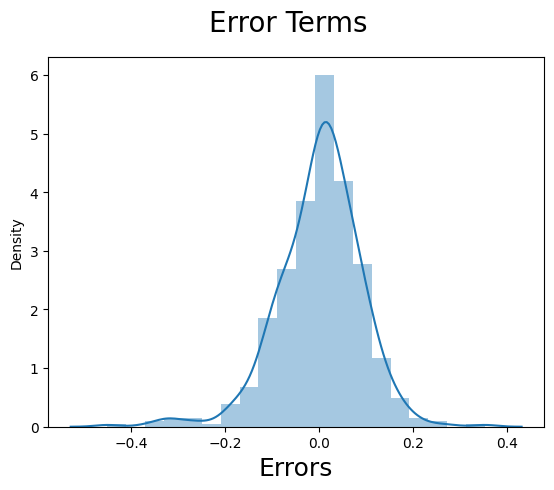

In [55]:
# Plot the histogram of the error terms
res = y_train - y_train_cnt
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Inference**: We can clearly see that the error terms is normally distributed and mean is at 0 from the chart

### Making predictions and validating with test data

In [56]:
## Applying scale on test set
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [57]:
## Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [58]:
X_train_lm.columns

Index(['year', 'holiday', 'temp', 'windspeed', 'Spring', 'Winter',
       'Light Rain/Snow', 'Mist/Cloudy', 'Sunday', 'Dec', 'Jan', 'Sep'],
      dtype='object')

In [59]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [60]:
# Making predictions
y_pred = lm2.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

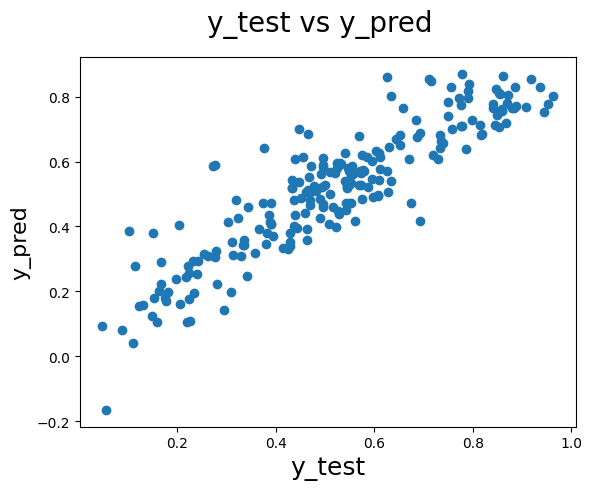

In [61]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### R2 score

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8070221749465513